# White Sturgeon Demographic Parameters 

A number of stock assessments have analyzed the demogrpahic rates of white sturgeon populaitons. Despite considerable effort there is substantial uncertinaty and several of the most important parameters have been estiamted using relationships between life hsitry paramters such as growth rates ($K$) and natrual mortality rates (the pauly equation). In this document I will discuss the paramter estiamtes and structural choices made in these previous analyses.  In partiucal I will focus on the models developed in *Smyth et al 2016*, *Wood et al 2007*, *Walters et al 2006*, and *Koorman and Walters 2001*. 

## Model structure 

Each of these papers develops a similar model structure. They track the popuatlions abundance and age structure over time, using a leslie matrix model. Fecundiity is modeld as a fucntion of age and survival is assumed to either be constant or to increase for older individuals to account for small numbers of very old individuals observed in fisheires and surveys. Finally, recruitment is assumed to be given by a beverton holt curve, there is not enough historical data to estimate paramters for this model so prior work has made various assumptions based on historical popualtion sizes and relatiohsios between egg production and recruitment.  

### Fecundity

Fecundity is assumed to be zero for individuals weighing less than $W_{mat}$ and propotional to the differnce between current weight and $W_{mat}$ other wise. Furthermore, some models include the idea of senescence, where older individuals stop spawining. These assumption can be used to construct a relationship between age and reletive fecundity, assuming cosntant growth rates over time. 

$L_a = L_{\infty}(1-exp(-Ka))$

$W_a = \frac{W_{100}}{100}L_a^3$

$ F_a = (W_a - W_{mat})*\left[1 - \frac{1}{1+exp(-\frac{a-\mu_s}{\sigma_s})}\right]$

where the second term on the right hand side of the third equation accounts for senescence. Sessence can be removed from the model by setting this term to one.   

The relatioship between fecundity and age 

In [8]:
using Plots
include("FecundityAgeRelationships.jl")
include("DemographicParameters.jl")

Main.DemographicParameters

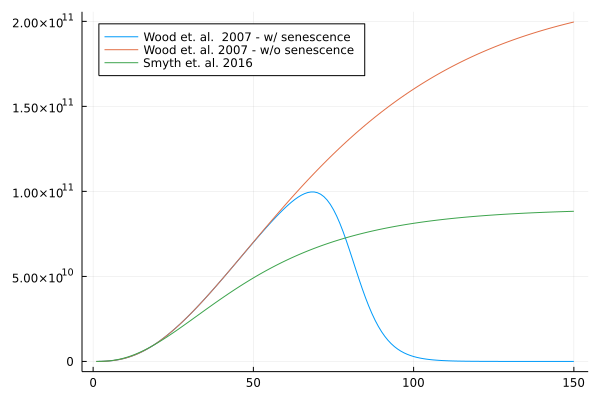

In [9]:
a = DemographicParameters.a
Plots.plot(a,DemographicParameters.Wood_07_F1_vec, label = "Wood et. al.  2007 - w/ senescence")
Plots.plot!(a,DemographicParameters.Wood_07_F2_vec, label = "Wood et. al. 2007 - w/o senescence", legend =:topleft)
Plots.plot!(a,DemographicParameters.Smyth_16_F_vec, label = "Smyth et. al. 2016", legend =:topleft)


### Survival

The survival probabilities for White sturgeon are assumed to be qite high. The pauly equation which related the von Bertlanffy growth parameter $K$ to mortaltiy rates in fish popualtion suggest $0.98-0.95$ for white sturgeon. However, age composition data suggests a value of about $0.9$. This discrepency can be reconciled by invodliing and increase in popualtion size in the years prior to age composition data was collected or by a negative relationship between age and encounter probability in sampling programs. It is also possible that mortaltiy rates for young sturgon are higher than expected and the $0.9$ estiamte is correct for these age classes, but older individuals have higher survival rates, explaining the presence of some extremely old individuals. 

Given an assumption about mortaltiy and fecundity at age we can plot an "impact function" which is the egg production times the probaiblity of survival to a given age. Life time egg production is determined by the integral under this curve. 

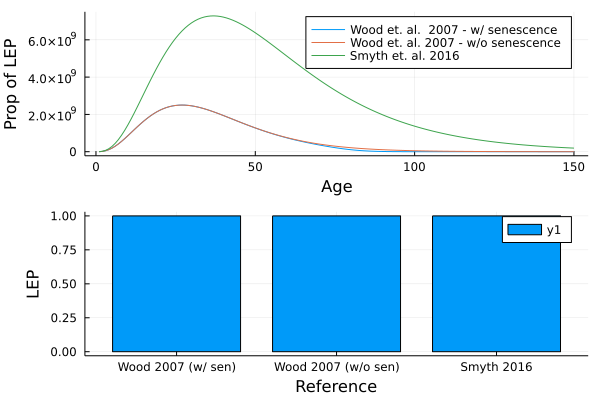

In [10]:

p1 = Plots.plot(a, DemographicParameters.Wood_2007_impact1 ./DemographicParameters.Wood_2007_LEP1  ,
                label = "Wood et. al.  2007 - w/ senescence")
Plots.plot!(p1, a,DemographicParameters.Wood_2007_impact2 ./DemographicParameters.Wood_2007_LEP2 
            , label = "Wood et. al. 2007 - w/o senescence")
Plots.plot!(p1, a,DemographicParameters.Smyth_2016_impact ./ DemographicParameters.Smyth_2016_LEP, label = "Smyth et. al. 2016", 
            legend =:topright, xlab = "Age", ylab = "Prop of LEP")


p3 = Plots.bar(["Wood 2007 (w/ sen)", "Wood 2007 (w/o sen)", "Smyth 2016"], 
            [DemographicParameters.Wood_2007_LEP1, DemographicParameters.Wood_2007_LEP2, DemographicParameters.Smyth_2016_LEP],
            xlab = "Reference", ylab = "LEP")



plot(p1,p3, layout = (2, 1))

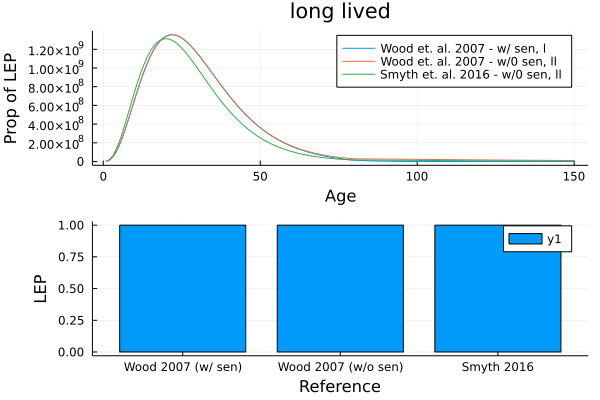

In [11]:
p2 = Plots.plot(a,DemographicParameters.Wood_2007_impact1_ll ./DemographicParameters.Wood_2007_LEP1_ll, 
                label = "Wood et. al. 2007 - w/ sen, l")

Plots.plot!(p2, a,DemographicParameters.Wood_2007_impact2_ll ./DemographicParameters.Wood_2007_LEP2_ll, 
            label = "Wood et. al. 2007 - w/0 sen, ll")
Plots.plot!(p2, a,DemographicParameters.Smyth_2016_impact_ll ./DemographicParameters.Smyth_2016_LEP_ll, 
        label = "Smyth et. al. 2016 - w/0 sen, ll",
            title = "long lived", xlab = "Age", ylab = "Prop of LEP")

p4 = Plots.bar(["Wood 2007 (w/ sen)", "Wood 2007 (w/o sen)", "Smyth 2016"], 
            [DemographicParameters.Wood_2007_LEP1_ll, DemographicParameters.Wood_2007_LEP2_ll, DemographicParameters.Smyth_2016_LEP_ll],
            xlab = "Reference", ylab = "LEP")
plot(p2,p4, layout = (2, 1))

#### generation time
In addition to life time egg prodcution these sunctions can be used to calculate the generation time of the popuatlion. This is the weighted average of the ages with weights given by the impact functions


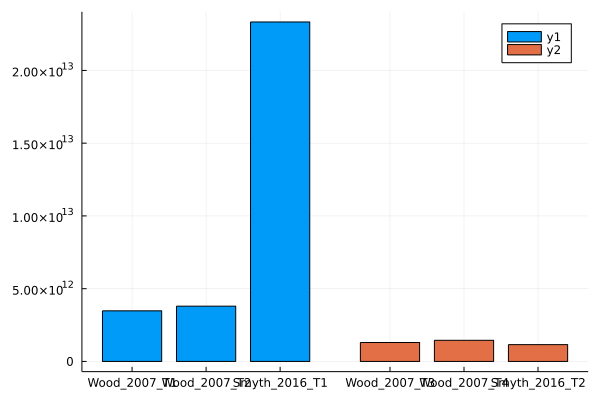

In [12]:

Plots.bar(["Wood_2007_T1","Wood_2007_T2", "Smyth_2016_T1"] ,
            [DemographicParameters.Wood_2007_T1,DemographicParameters.Wood_2007_T2, DemographicParameters.Smyth_2016_T1])
Plots.bar!(["Wood_2007_T3", "Wood_2007_T4", "Smyth_2016_T2"],
            [ DemographicParameters.Wood_2007_T3, DemographicParameters.Wood_2007_T4, DemographicParameters.Smyth_2016_T2])

### Recruitment

The previous modeling studies have assumed that recruitment to age one is given by a density dependent relationship attributed to Beverton and Holt. 

$R_t = \frac{\alpha E_t}{1+\beta E_T}$

Where $E_t$ is the totla egg production in year $t$ $\sum_{a = 1}^{A_{max}}F_a N_a$ and $\alpha$ and $\beta$ are determined by an assumption about the equlibrium recruitment rate and $\alpha$ is detemrined by the Goodyear compensation ratio $k \approx 5$ which determines the slope of the egg rectuit relationship around equilibirum. 

$\alpha = k R^*/E^*$

$\beta = \frac{(1-k)}{E^*}$

The Goodyear compnsation ratio is not estimated but instead picked from a range of values that are consistent with other fish populations $3-10$. This ratio determines the strengt hof density dependence and the growth rate of the popuatlion at low abudances. This intern determines the popuatlions resiliance to perturbations. 


#### $R^*/E^*$

The ratio of recruits to egg production at equilibirum ($R^*/E^*$) is set so that $LEP*R^* = E^*$. In this case the parameters of a Beverton-Holt stock recruit curve can be given by an assumption about equilibrium recruitment rate $R^*$ and the compensation ratio $k$. 

$\alpha = \frac{k}{LEP}$

$\beta = \frac{k-1}{R_{star}*LEP}$

#### Plots

The stock recruit curves given the LEP esitmate from Smyth 2016 and $k \in \{3,5,7,9\}$ are shown below along with a heat map showing the relationship the values of $\alpha$ for each of the six estimates of LEP discussed above and $k \in \{3,5,7,9\}$. In each scenario $R^*$ is set to yield and equilibrium popualtion size of 1500.

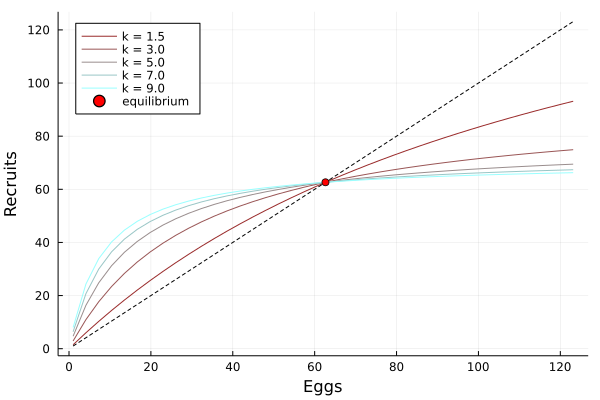

In [13]:
include("StockRecruitCurves.jl")
include("DemographicParameters.jl")

# Egg production levels
E_star = DemographicParameters.Smyth_16_R_star * DemographicParameters.Smyth_2016_LEP
E = 1:(E_star/20):(2*E_star)

# vlaues of k
n_k = 5
kls = [1.5,3,5,7,9]

# initalize plot
sr = DemographicParameters.Smyth_2016_sr
StockRecruitCurves.update_BevetonHolt_k!(sr,kls[1])
p1 = Plots.plot(E,sr.(E), 
                color = RGB(0.6,kls[1]/kls[n_k],kls[1]/kls[n_k]),
                label = string("k = ", kls[1]))

for i in 2:n_k
    StockRecruitCurves.update_BevetonHolt_k!(sr,kls[i])
    Plots.plot!(p1,E,sr.(E), 
    color = RGB(0.6,kls[i]/kls[n_k],kls[i]/kls[n_k]), label = string("k = ", kls[i]))
end 
Plots.plot!(p1,E,E./DemographicParameters.Smyth_2016_LEP, color = "black", linestyle =:dash, legend =:topleft, label = "")
Plots.scatter!(p1,[E_star],[DemographicParameters.Smyth_16_R_star], color = "red", label = "equilibrium",
            legend =:topleft, xlab = "Eggs", ylab = "Recruits")
p1

### Implications

One of the main issues at stake in paramter estiamtes is the growth rate of the population at low abudnaces and the turnover rate of the population. higher natrual mortality rates imply faster population turnover, and higher reproduction. Both of these factors tend to increase the resiliance of populations to distribances and imply faster recovery rates when they are at low abundance. Similarlly, popualtion with higher rates of denstiy dependent mortaltiy will also tend to be more resiliant because all else equal, greater denstiy dependent mortality near equilibirum implies faster population growth at low abundnaces. 

The resiliance of the popuatlion is a critical factor determining how changes in fittness caused by hatchery programs will impact the demography of a population. The abundance of more resiliant popuatlions will be less effected by decreases in fittness caused by a hatcheyr program because the decines in fittness will be quickly offset by decreases in denstiy dependent mortaltiy as the popuatlion's size declines. 

Here I calcualte the resiliance of the popuatlion at equilibrium for each of the differnt paramter set by linearlizing the model around the equilbirium popupulaiton size and computing the leading eigen value. for a discrete time system $1-\lambda$ is a measure of resiliance. 

In [14]:
using LinearAlgebra
include("AgeStructuredModels.jl")

Main.AgeStructuredModels

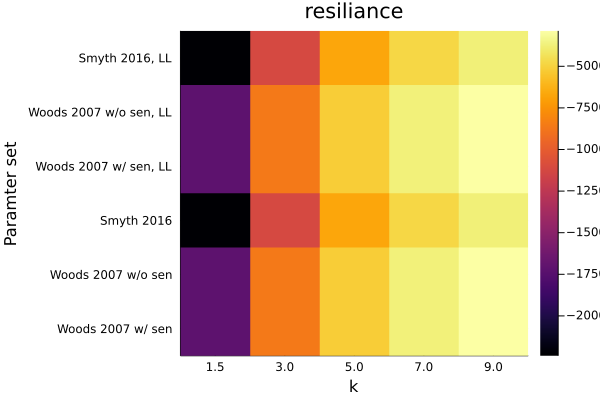

In [15]:


LEP = [DemographicParameters.Wood_2007_LEP1,DemographicParameters.Wood_2007_LEP2,
                DemographicParameters.Smyth_2016_LEP,DemographicParameters.Wood_2007_LEP1_ll,
                DemographicParameters.Wood_2007_LEP1_ll,DemographicParameters.Smyth_2016_LEP_ll]

fecundity = hcat(DemographicParameters.Wood_07_F1_vec,DemographicParameters.Wood_07_F2_vec,
                 DemographicParameters.Smyth_16_F_vec,DemographicParameters.Wood_07_F1_vec,
                 DemographicParameters.Wood_07_F2_vec, DemographicParameters.Smyth_16_F_vec)

survival = hcat(DemographicParameters.Wood_2007_survival,DemographicParameters.Wood_2007_survival,
                DemographicParameters.Smyth_2016_survival,DemographicParameters.long_lived_survival,
                DemographicParameters.long_lived_survival,DemographicParameters.long_lived_survival)



# vlaues of k
n_k = 5
k = [1.5,3,5,7,9]

alpha = k ./ transpose(LEP) # compute alpha values 
resiliance = zeros(length(LEP),length(k))
    
A_max = DemographicParameters.A_max

p1 = Plots.plot()
for i in 1:length(LEP)
    for j in 1:n_k

        
        J = AgeStructuredModels.build_leslie_matrix(A_max,survival[:,i],fecundity[:,i] .* 1/(alpha[j,i]*(LEP[i])^2))
        if i == 5 && j ==1
            Plots.heatmap!(p1,J)
        end 
        vals = eigen(J)

        resiliance[i,j] = 1- real.(vals.values[argmax(real.(vals.values))])
    end
end 
            
Plots.heatmap(resiliance, title = "resiliance", xlab = "k", ylab = "Paramter set",
             xticks = (1:5,string.(k)),
             yticks = (1:6, ["Woods 2007 w/ sen", "Woods 2007 w/o sen", "Smyth 2016",
                         "Woods 2007 w/ sen, LL", "Woods 2007 w/o sen, LL", "Smyth 2016, LL"]))
     
            

### resiliance 

This figure above indicates that assumptions about the Goodyear ration $k$ dominate the resilinace of the popualtion at equilibrium. The assumptions about mortality rates and senescence have a smaller effect on the results, but it seems that the popuatlion with higher mortality rates are more resiliant. Senesence also seems to increase resiliance, because this has a similar effect to increasing the turnver rate. 